In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
test_condition = 'Same'
instrument = 'Olympic'

In [3]:
df = pd.read_csv('Olympic_noswap_noreset.csv')
df.head()
print(df.columns)

Index(['active_reagent_map', 'device_task_running', 'device_task_top_level',
       'device_task_view_id', 'error', 'instrument_name', 'is_simulated',
       'local_ts', 'running_api_function', 'argus_runtime_uuid', 'carrier_id',
       'creation_ts', 'dispense_type', 'duration_ms', 'exc_info',
       'fc_sensor_data', 'metadata', 'post_weight_mg', 'pre_weight_mg', 'uuid',
       'valve_num', 'weight_mg', 'volume_ul', 'reagent',
       'dispense_lohms_psi_s_ul', 'is_lohms_override'],
      dtype='object')


In [4]:
df_runtime = df.loc[(df['device_task_top_level'] != 'Fluidics Calibration')
                    & (df['device_task_view_id'] != 'calibrate')
                    & (df['device_task_view_id'] != 'prep_reagents') 
                    & (df['dispense_type'] == 'reagent') 
                    & (df['volume_ul'] > 75)
                    & (df['reagent'] != 'H2O')]

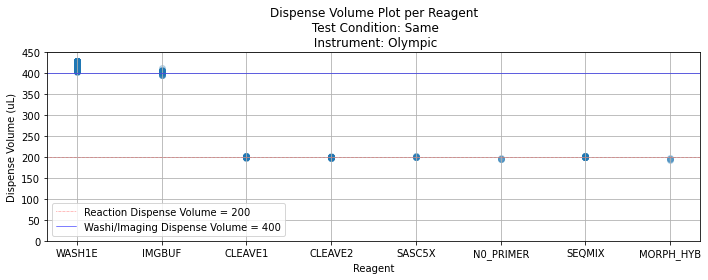

In [5]:
fig, ax = plt.subplots(figsize=(10,4))

ax.scatter(df_runtime['reagent'], df_runtime['weight_mg'], alpha=0.25)
ax.set(xlabel='Reagent', ylabel='Dispense Volume (uL)', 
       title='Dispense Volume Plot per Reagent'
       '\n Test Condition: {0}'
       '\n Instrument: {1}'.format(test_condition, instrument),
      ylim=(0,450))
ax.axhline(200, color='r', label='Reaction Dispense Volume = 200', linewidth=0.5, linestyle=':')
ax.axhline(400, color = 'b', label='Washi/Imaging Dispense Volume = 400', linewidth=0.5)
ax.legend()
plt.grid()
plt.tight_layout()
plt.show()

In [6]:
df_runtime.groupby('reagent').weight_mg.describe()

,count,mean,std,min,25%,50%,75%,max
reagent,,,,,,,,
CLEAVE1,24.0,200.646943,1.199675,197.564544,200.183461,200.691558,201.399143,202.642105
CLEAVE2,24.0,200.196817,0.985836,198.151072,199.776812,200.480135,200.736741,201.929405
IMGBUF,32.0,403.296792,3.776333,395.166598,402.215167,404.008852,405.504159,412.220248
MORPH_HYB,4.0,195.505727,1.145172,194.157906,194.912379,195.489529,196.082878,196.885944
N0_PRIMER,4.0,196.185179,0.818949,195.324142,195.774268,196.067533,196.478443,197.281510
SASC5X,8.0,201.041088,0.788475,199.992498,200.457117,201.013807,201.410225,202.430682
SEQMIX,20.0,201.131283,0.961505,199.777665,200.437509,201.042793,201.986523,202.986520
WASH1E,840.0,424.639582,5.354217,403.088140,423.787131,426.365127,427.937160,430.215072


In [7]:
sums = df_runtime.groupby('reagent', as_index=False).sum()

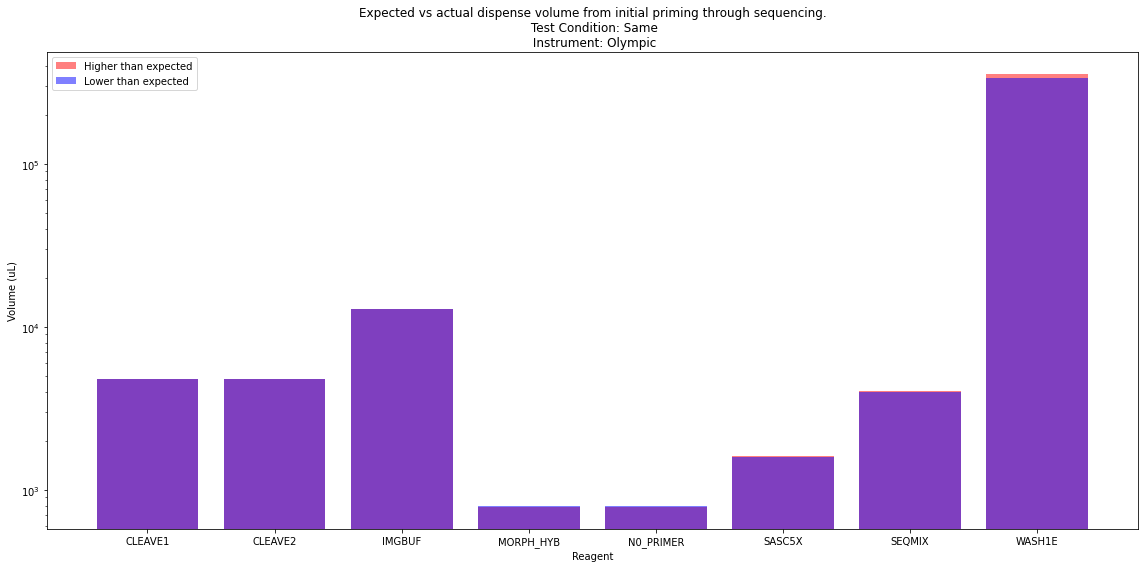

In [8]:
fig, ax = plt.subplots(figsize=(16,8))
ax.bar(sums['reagent'], sums['weight_mg'], color='r', alpha=0.5, label='Higher than expected')
ax.bar(sums['reagent'], sums['volume_ul'], color='b', alpha=0.5, label='Lower than expected')
ax.set(xlabel='Reagent', ylabel='Volume (uL)', 
       title='Expected vs actual dispense volume from initial priming through sequencing.'
       '\n Test Condition: {0}'
       '\n Instrument: {1}'.format(test_condition, instrument), yscale='log')
# ax.set_xticklabels(sums['reagent'], rotation=90)
ax.legend()
plt.tight_layout()
plt.show()

In [9]:
sums['per_error'] = (sums['weight_mg'] - sums['volume_ul']) / sums['volume_ul']

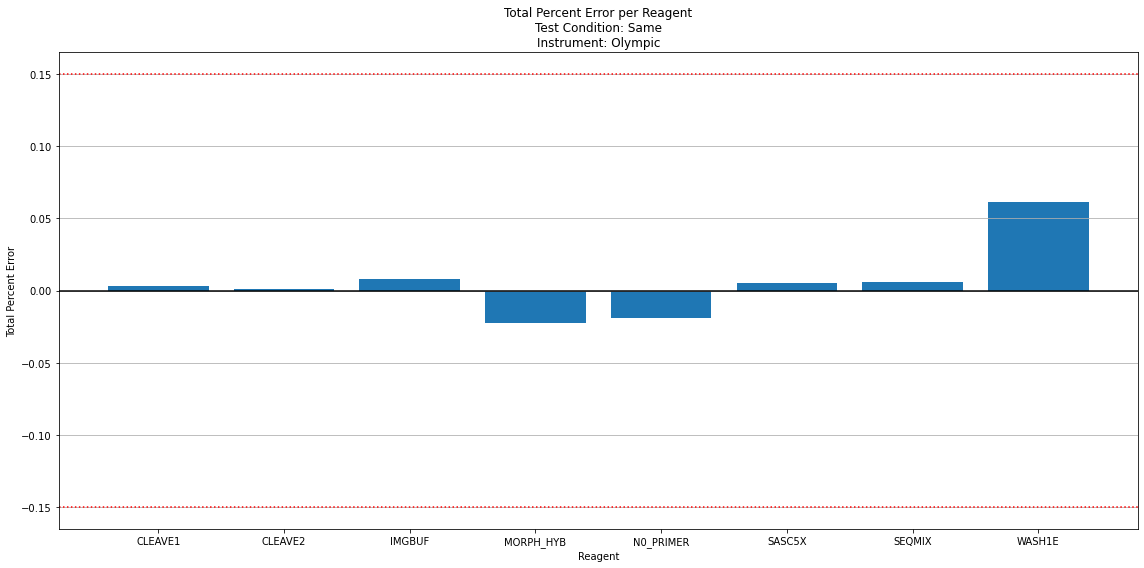

In [10]:
fig, ax = plt.subplots(figsize=(16,8))
ax.bar(sums['reagent'], sums['per_error'])
ax.axhline(0.15, color='r', linestyle=':')
ax.axhline(-0.15, color='r', linestyle=':')
ax.axhline(0, color='k', linestyle='-')
# ax.set_xticklabels(sums['reagent'], rotation=45)
ax.set(xlabel='Reagent', ylabel='Total Percent Error', 
       title='Total Percent Error per Reagent'
      '\nTest Condition: {0}'
      '\nInstrument: {1}'.format(test_condition, instrument))

plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [11]:
wash_df = df_runtime.loc[df_runtime['reagent'] == 'WASH1E'].copy()
wash_df = wash_df.sort_values('weight_mg')
wash_df.head()

,active_reagent_map,device_task_running,device_task_top_level,device_task_view_id,error,instrument_name,is_simulated,local_ts,running_api_function,argus_runtime_uuid,...,metadata,post_weight_mg,pre_weight_mg,uuid,valve_num,weight_mg,volume_ul,reagent,dispense_lohms_psi_s_ul,is_lohms_override
160,SBL (pre-production),Dispense WASH1E cycle 1/1,Sequencing Run,roi_selection,NaN,olympic,False,2020-09-30T17:57:41.916308-04:00,fl_dispense_reagent_to_wells,d4be5aac-7198-4ed5-89a5-0e1620545fc0,...,"{'slot_num': 1, 'well_num': 1}",9097.980911,8694.892771,eb1f3abd-8c28-4dae-99d3-de422efebb75,18,403.088140,400,WASH1E,0.029759,False
145,SBL (pre-production),Dispense WASH1E cycle 1/1,Sequencing Run,roi_selection,NaN,olympic,False,2020-09-30T17:52:42.229060-04:00,fl_dispense_reagent_to_wells,d4be5aac-7198-4ed5-89a5-0e1620545fc0,...,"{'slot_num': 1, 'well_num': 2}",9160.572342,8757.010206,3f9f4aeb-49bd-44fa-824e-c134a870ac98,18,403.562136,400,WASH1E,0.029759,False
163,SBL (pre-production),Dispense WASH1E cycle 1/1,Sequencing Run,roi_selection,NaN,olympic,False,2020-09-30T17:58:35.001163-04:00,fl_dispense_reagent_to_wells,d4be5aac-7198-4ed5-89a5-0e1620545fc0,...,"{'slot_num': 1, 'well_num': 2}",9584.877801,9179.948235,e826bd97-fa1a-4d7c-a77f-d6e76d774064,18,404.929565,400,WASH1E,0.029759,False
2045,SBL (pre-production),Dispense WASH1E cycle 1/1,Sequencing Run,progress,NaN,olympic,False,2020-10-01T09:17:41.106659-04:00,fl_dispense_reagent_to_wells,d4be5aac-7198-4ed5-89a5-0e1620545fc0,...,"{'slot_num': 2, 'well_num': 2}",9101.851315,8696.417063,6b53af6d-2749-436b-94cd-74ad9e4bc8b1,18,405.434253,400,WASH1E,0.029759,False
148,SBL (pre-production),Dispense WASH1E cycle 1/1,Sequencing Run,roi_selection,NaN,olympic,False,2020-09-30T17:53:35.034228-04:00,fl_dispense_reagent_to_wells,d4be5aac-7198-4ed5-89a5-0e1620545fc0,...,"{'slot_num': 2, 'well_num': 1}",9645.222011,9239.740018,66d9b941-4954-4b55-95b9-5dad6cff6c2d,18,405.481993,400,WASH1E,0.029759,False


In [12]:
suspect=wash_df.head()

In [13]:
suspect


,active_reagent_map,device_task_running,device_task_top_level,device_task_view_id,error,instrument_name,is_simulated,local_ts,running_api_function,argus_runtime_uuid,...,metadata,post_weight_mg,pre_weight_mg,uuid,valve_num,weight_mg,volume_ul,reagent,dispense_lohms_psi_s_ul,is_lohms_override
160,SBL (pre-production),Dispense WASH1E cycle 1/1,Sequencing Run,roi_selection,NaN,olympic,False,2020-09-30T17:57:41.916308-04:00,fl_dispense_reagent_to_wells,d4be5aac-7198-4ed5-89a5-0e1620545fc0,...,"{'slot_num': 1, 'well_num': 1}",9097.980911,8694.892771,eb1f3abd-8c28-4dae-99d3-de422efebb75,18,403.088140,400,WASH1E,0.029759,False
145,SBL (pre-production),Dispense WASH1E cycle 1/1,Sequencing Run,roi_selection,NaN,olympic,False,2020-09-30T17:52:42.229060-04:00,fl_dispense_reagent_to_wells,d4be5aac-7198-4ed5-89a5-0e1620545fc0,...,"{'slot_num': 1, 'well_num': 2}",9160.572342,8757.010206,3f9f4aeb-49bd-44fa-824e-c134a870ac98,18,403.562136,400,WASH1E,0.029759,False
163,SBL (pre-production),Dispense WASH1E cycle 1/1,Sequencing Run,roi_selection,NaN,olympic,False,2020-09-30T17:58:35.001163-04:00,fl_dispense_reagent_to_wells,d4be5aac-7198-4ed5-89a5-0e1620545fc0,...,"{'slot_num': 1, 'well_num': 2}",9584.877801,9179.948235,e826bd97-fa1a-4d7c-a77f-d6e76d774064,18,404.929565,400,WASH1E,0.029759,False
2045,SBL (pre-production),Dispense WASH1E cycle 1/1,Sequencing Run,progress,NaN,olympic,False,2020-10-01T09:17:41.106659-04:00,fl_dispense_reagent_to_wells,d4be5aac-7198-4ed5-89a5-0e1620545fc0,...,"{'slot_num': 2, 'well_num': 2}",9101.851315,8696.417063,6b53af6d-2749-436b-94cd-74ad9e4bc8b1,18,405.434253,400,WASH1E,0.029759,False
148,SBL (pre-production),Dispense WASH1E cycle 1/1,Sequencing Run,roi_selection,NaN,olympic,False,2020-09-30T17:53:35.034228-04:00,fl_dispense_reagent_to_wells,d4be5aac-7198-4ed5-89a5-0e1620545fc0,...,"{'slot_num': 2, 'well_num': 1}",9645.222011,9239.740018,66d9b941-4954-4b55-95b9-5dad6cff6c2d,18,405.481993,400,WASH1E,0.029759,False


In [14]:
first_dict = suspect['fc_sensor_data'].iloc[0]

In [15]:
import ast
first_real = ast.literal_eval(first_dict)

In [16]:
first_real[0]

['2020-09-30T21:57:42.177201Z',
 {'err_uid': '0',
  'err_code': 0,
  'err_family': 0,
  'abs_pressure_bar': 1.005631,
  'diff_pressure': -192,
  'diff_pressure_filtered': -213.642532,
  'diff_pressure_stable': True,
  'diff_pressure_slope': 40.262535,
  'gauge_pressure_psi': 5.64889,
  'gauge_pressure_filtered': 6574.171387,
  'gauge_pressure_stable': True,
  'gauge_pressure_slope': 0.0}]

keyerror
keyerror
keyerror
keyerror
keyerror
keyerror
keyerror
keyerror
keyerror
keyerror


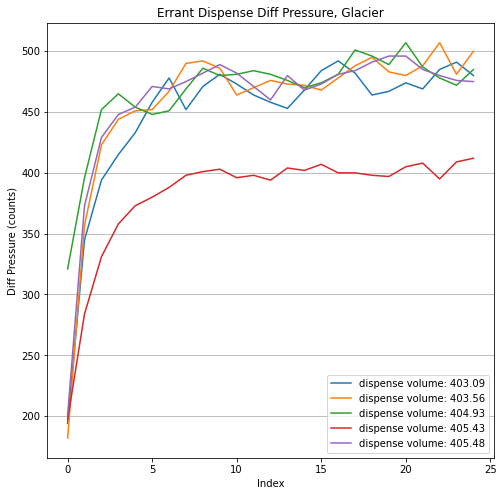

In [17]:
dispenses_full = []
dispense_weight = []
for i in range(len(suspect)):
    dict_string = suspect['fc_sensor_data'].iloc[i]
    dispenses_full.append(ast.literal_eval(dict_string))
    dispense_weight.append(suspect['weight_mg'].iloc[i])

all_dispense = []    
for dispense in dispenses_full:
#     print(dispense)
    single_dispense = []
    for point in dispense:
#         print(point[1])
        try:
            single_dispense.append(-1 * point[1]['state']['diff_pressure'])
        except KeyError:
            print("keyerror")
#     print(single_dispense)
    all_dispense.append(single_dispense)


fig, ax = plt.subplots(figsize=(8,8))
for dispense, weight in zip(all_dispense, dispense_weight):
    ax.plot(range(len(dispense)), dispense, label='dispense volume: {0:.2f}'.format(weight))
ax.set(xlabel='Index', ylabel='Diff Pressure (counts)', title='Errant Dispense Diff Pressure, Glacier')
ax.legend()
plt.grid(axis='y')
plt.show()